# Bullwhip Effect


$$\frac{dI_k}{dt} = - S_{k-1} + R_{k+1}$$

In [24]:
import pyomo.environ as pyo
import pyomo.dae as dae

m = pyo.ConcreteModel()

m.ECHELONS = pyo.Set(initialize=["Retail", "Wholesale", "Manufacturer"])

m.t = dae.ContinuousSet(bounds=(0, 10))
m.I = pyo.Var(m.t, m.ECHELONS)



m.dxdt = dae.DerivativeVar(m.x)

@m.Constraint(m.t)
def ode(m, t):
    return m.dxdt[t] == 0.2*m.x[t] + m.u[t]

m.x[0].fix(0)
m.x[10].fix(100)

pyo.TransformationFactory('dae.finite_difference').apply_to(m, nfe=100)
pyo.SolverFactory('ipopt').solve(m)

ERROR: Rule failed when generating expression for Constraint ode with index 0:
    KeyError: "Index '0' is not valid for indexed component 'dxdt'"
ERROR: Constructing component 'ode' from data=None failed: KeyError: "Index
    '0' is not valid for indexed component 'dxdt'"


KeyError: "Index '0' is not valid for indexed component 'dxdt'"

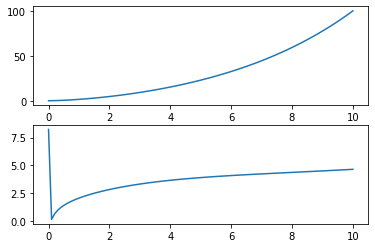

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1)
ax[0].plot(m.t, [m.x[t].value for t in m.t])

ax[1].plot(m.t, [m.u[t].value for t in m.t])